<a href="https://colab.research.google.com/github/andersonkaci/OSU_YOLO/blob/main/YOLOv10m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Dec  4 18:59:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


## Inference with model pre-trained on COCO dataset

### CLI

**NOTE:** CLI requires no customization or Python code. You can simply run all tasks from the terminal with the yolo command.

In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 5.35M/5.35M [00:00<00:00, 95.9MB/s]
WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 104k/104k [00:00<00:00, 44.7MB/s]
image 1/1 /content/dog.jpeg: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 61.4ms
Speed: 11.7ms 

**NOTE:** Result annotated image got saved in `{HOME}/runs/detect/predict/`. Let's display it.

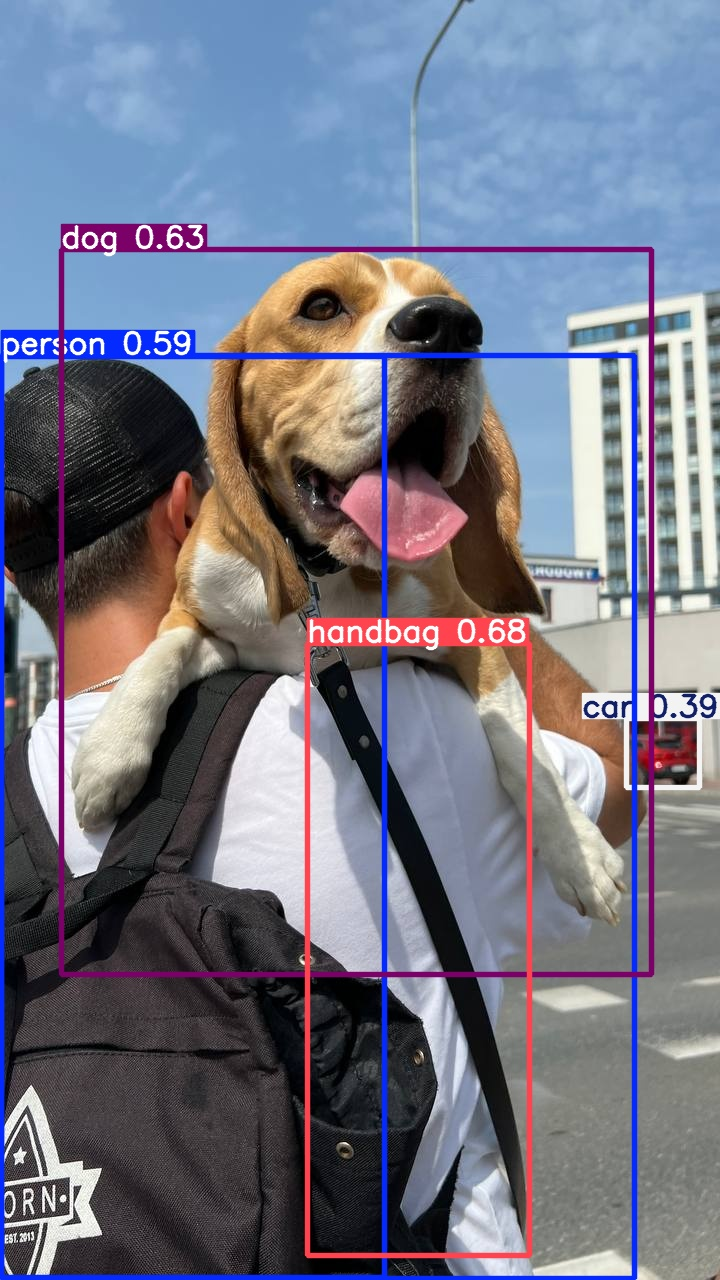

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/dog.jpeg', width=600)

### SDK

**NOTE:** YOLO's Python interface allows for seamless integration into your Python projects, making it easy to load, run, and process the model's output.

**NOTE:** The obtained `result` object stores information about the location, classes, and confidence levels of the detected objects.

## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0ePQ94rurAqXYZz9Cxib")
project = rf.workspace("project2-hhxsv").project("project2-kawzx")
version = project.version(4)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project2-4 in yolov11:: 100%|██████████| 1240/1240 [00:00<00:00, 5816.36it/s]


## Custom Training

In [ ]:
%cd {HOME}

# Step 5: Start the training process
!yolo task=detect mode=train model=yolov10n.pt data=/content/datasets/Project2-4/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 32.1M/32.1M [00:00<00:00, 102MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/datasets/Project2-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1733338993.e472094c4226.1382.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1360.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1361.jpg  weights
P_curve.png					    train_batch1362.jpg


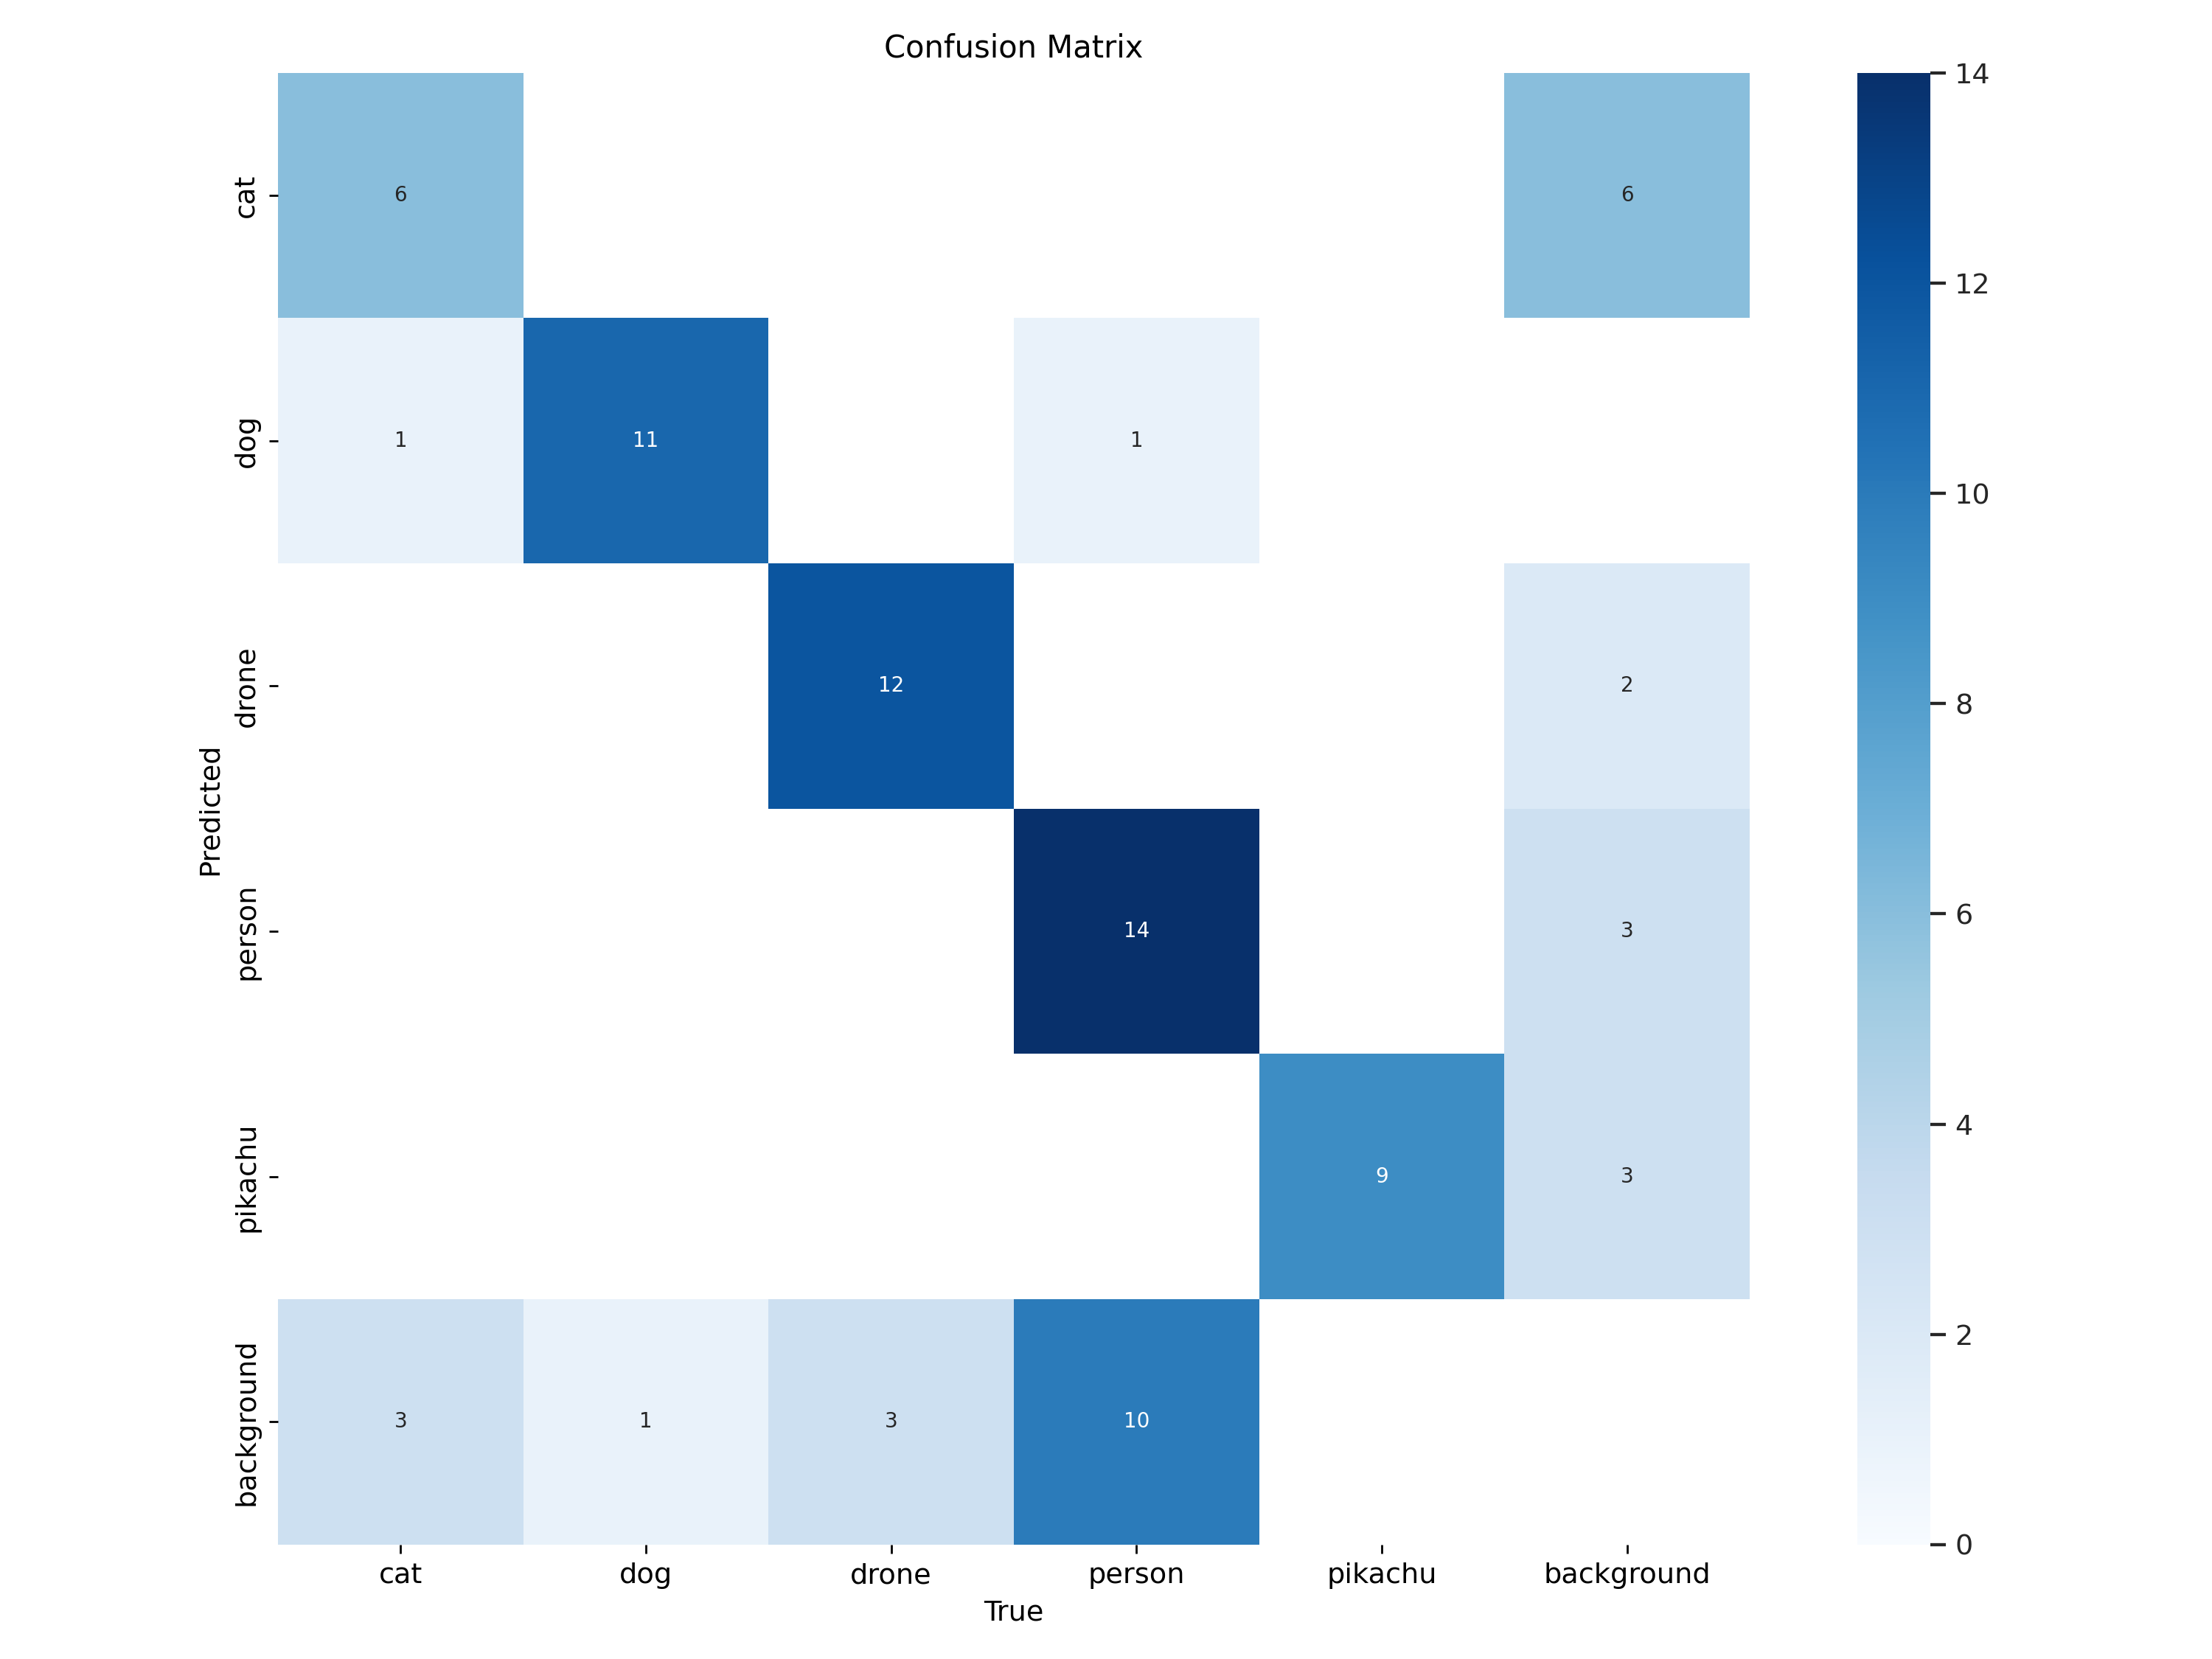

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

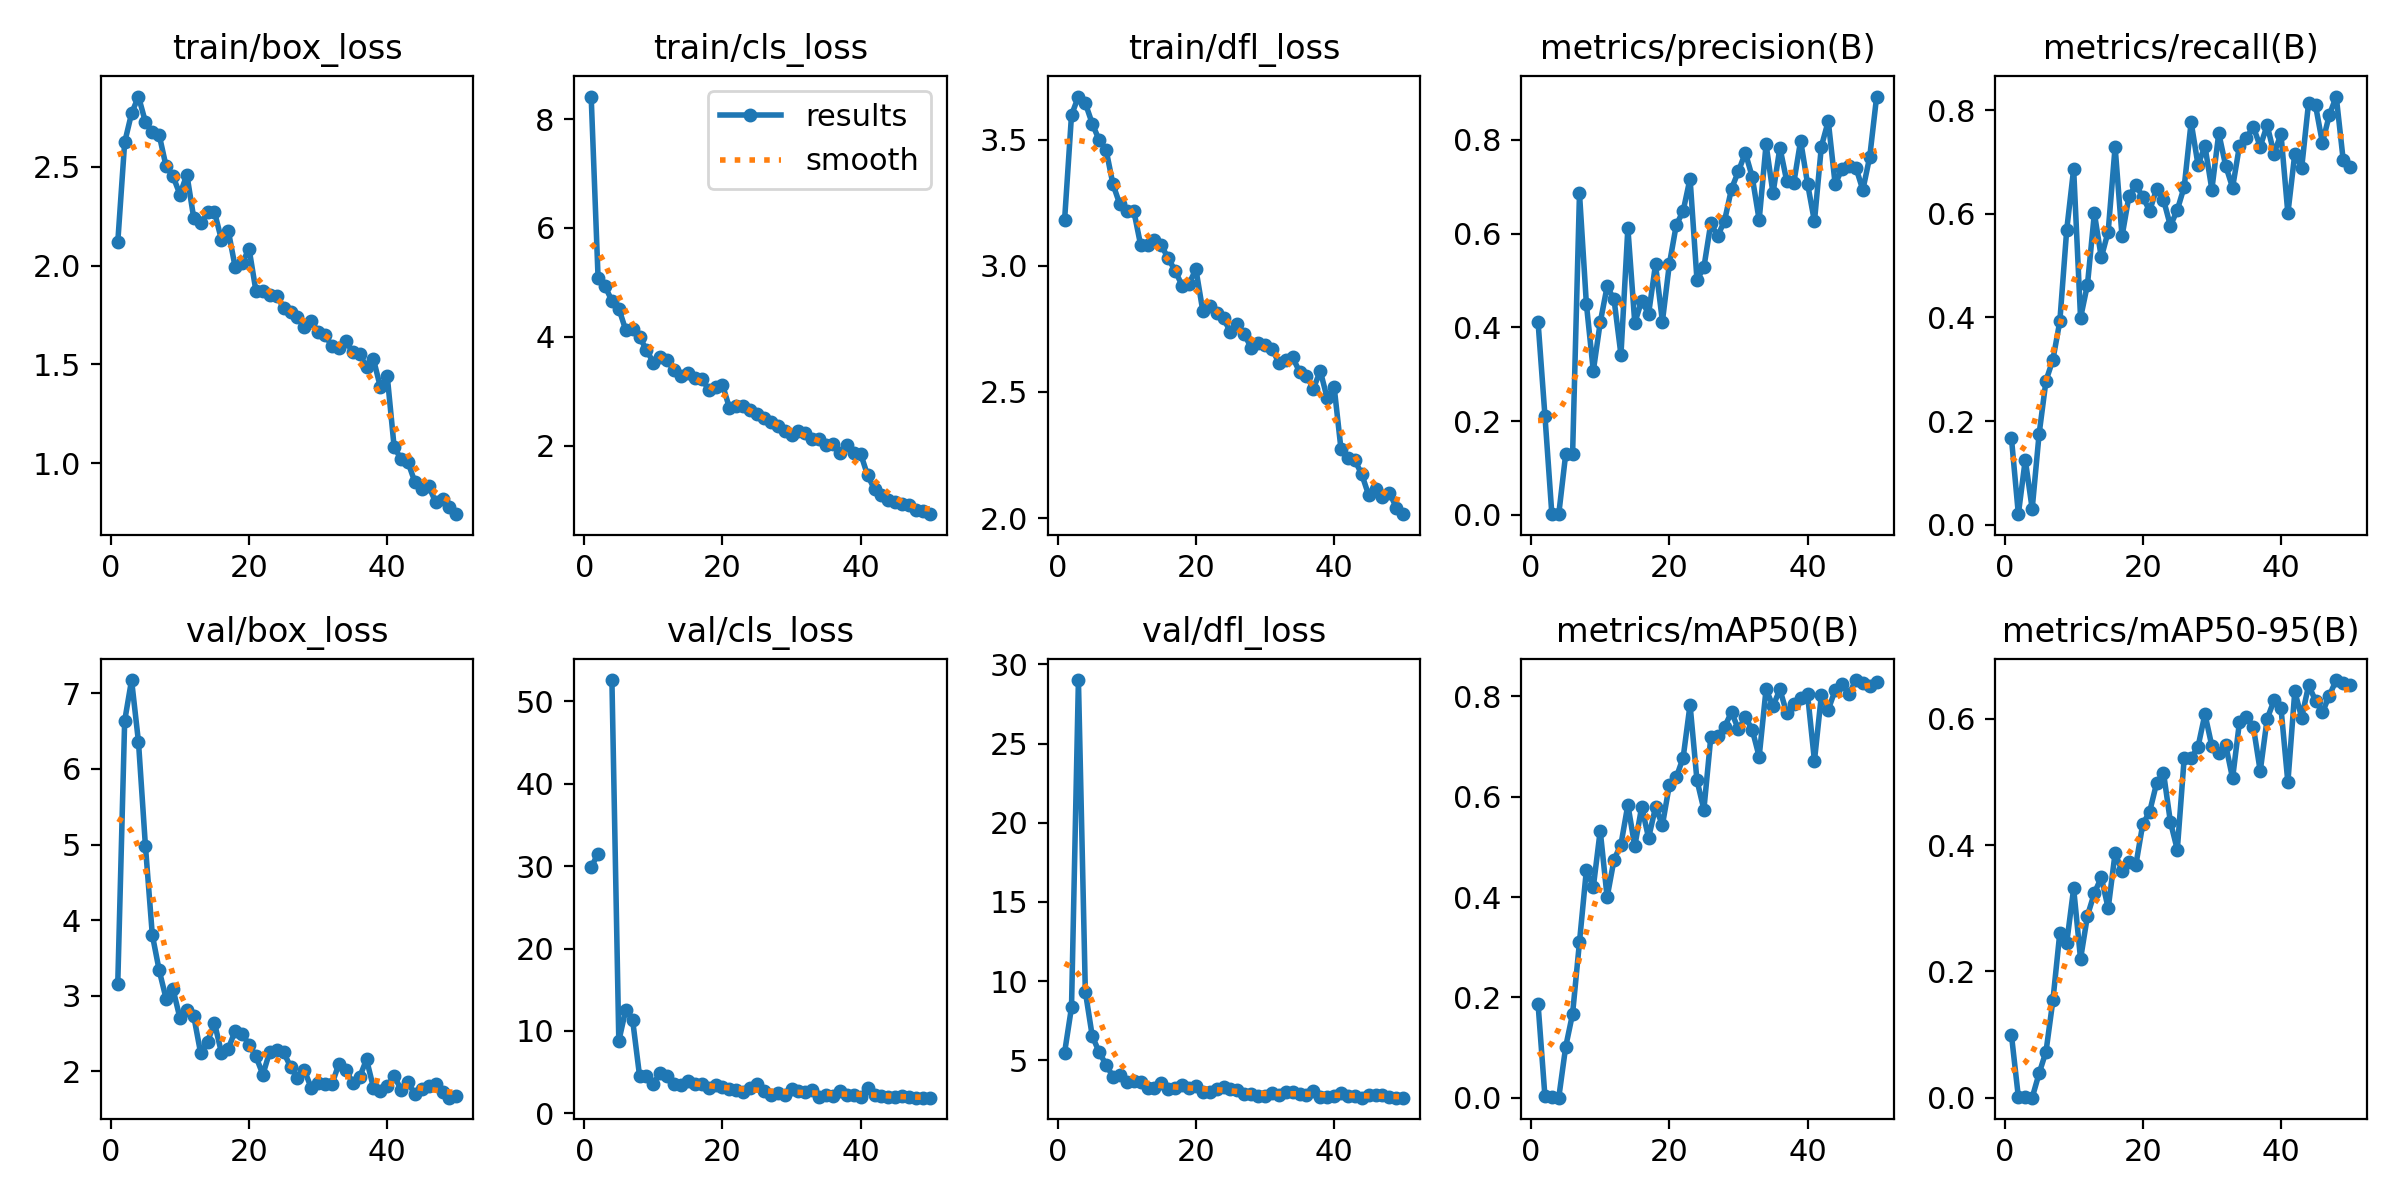

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

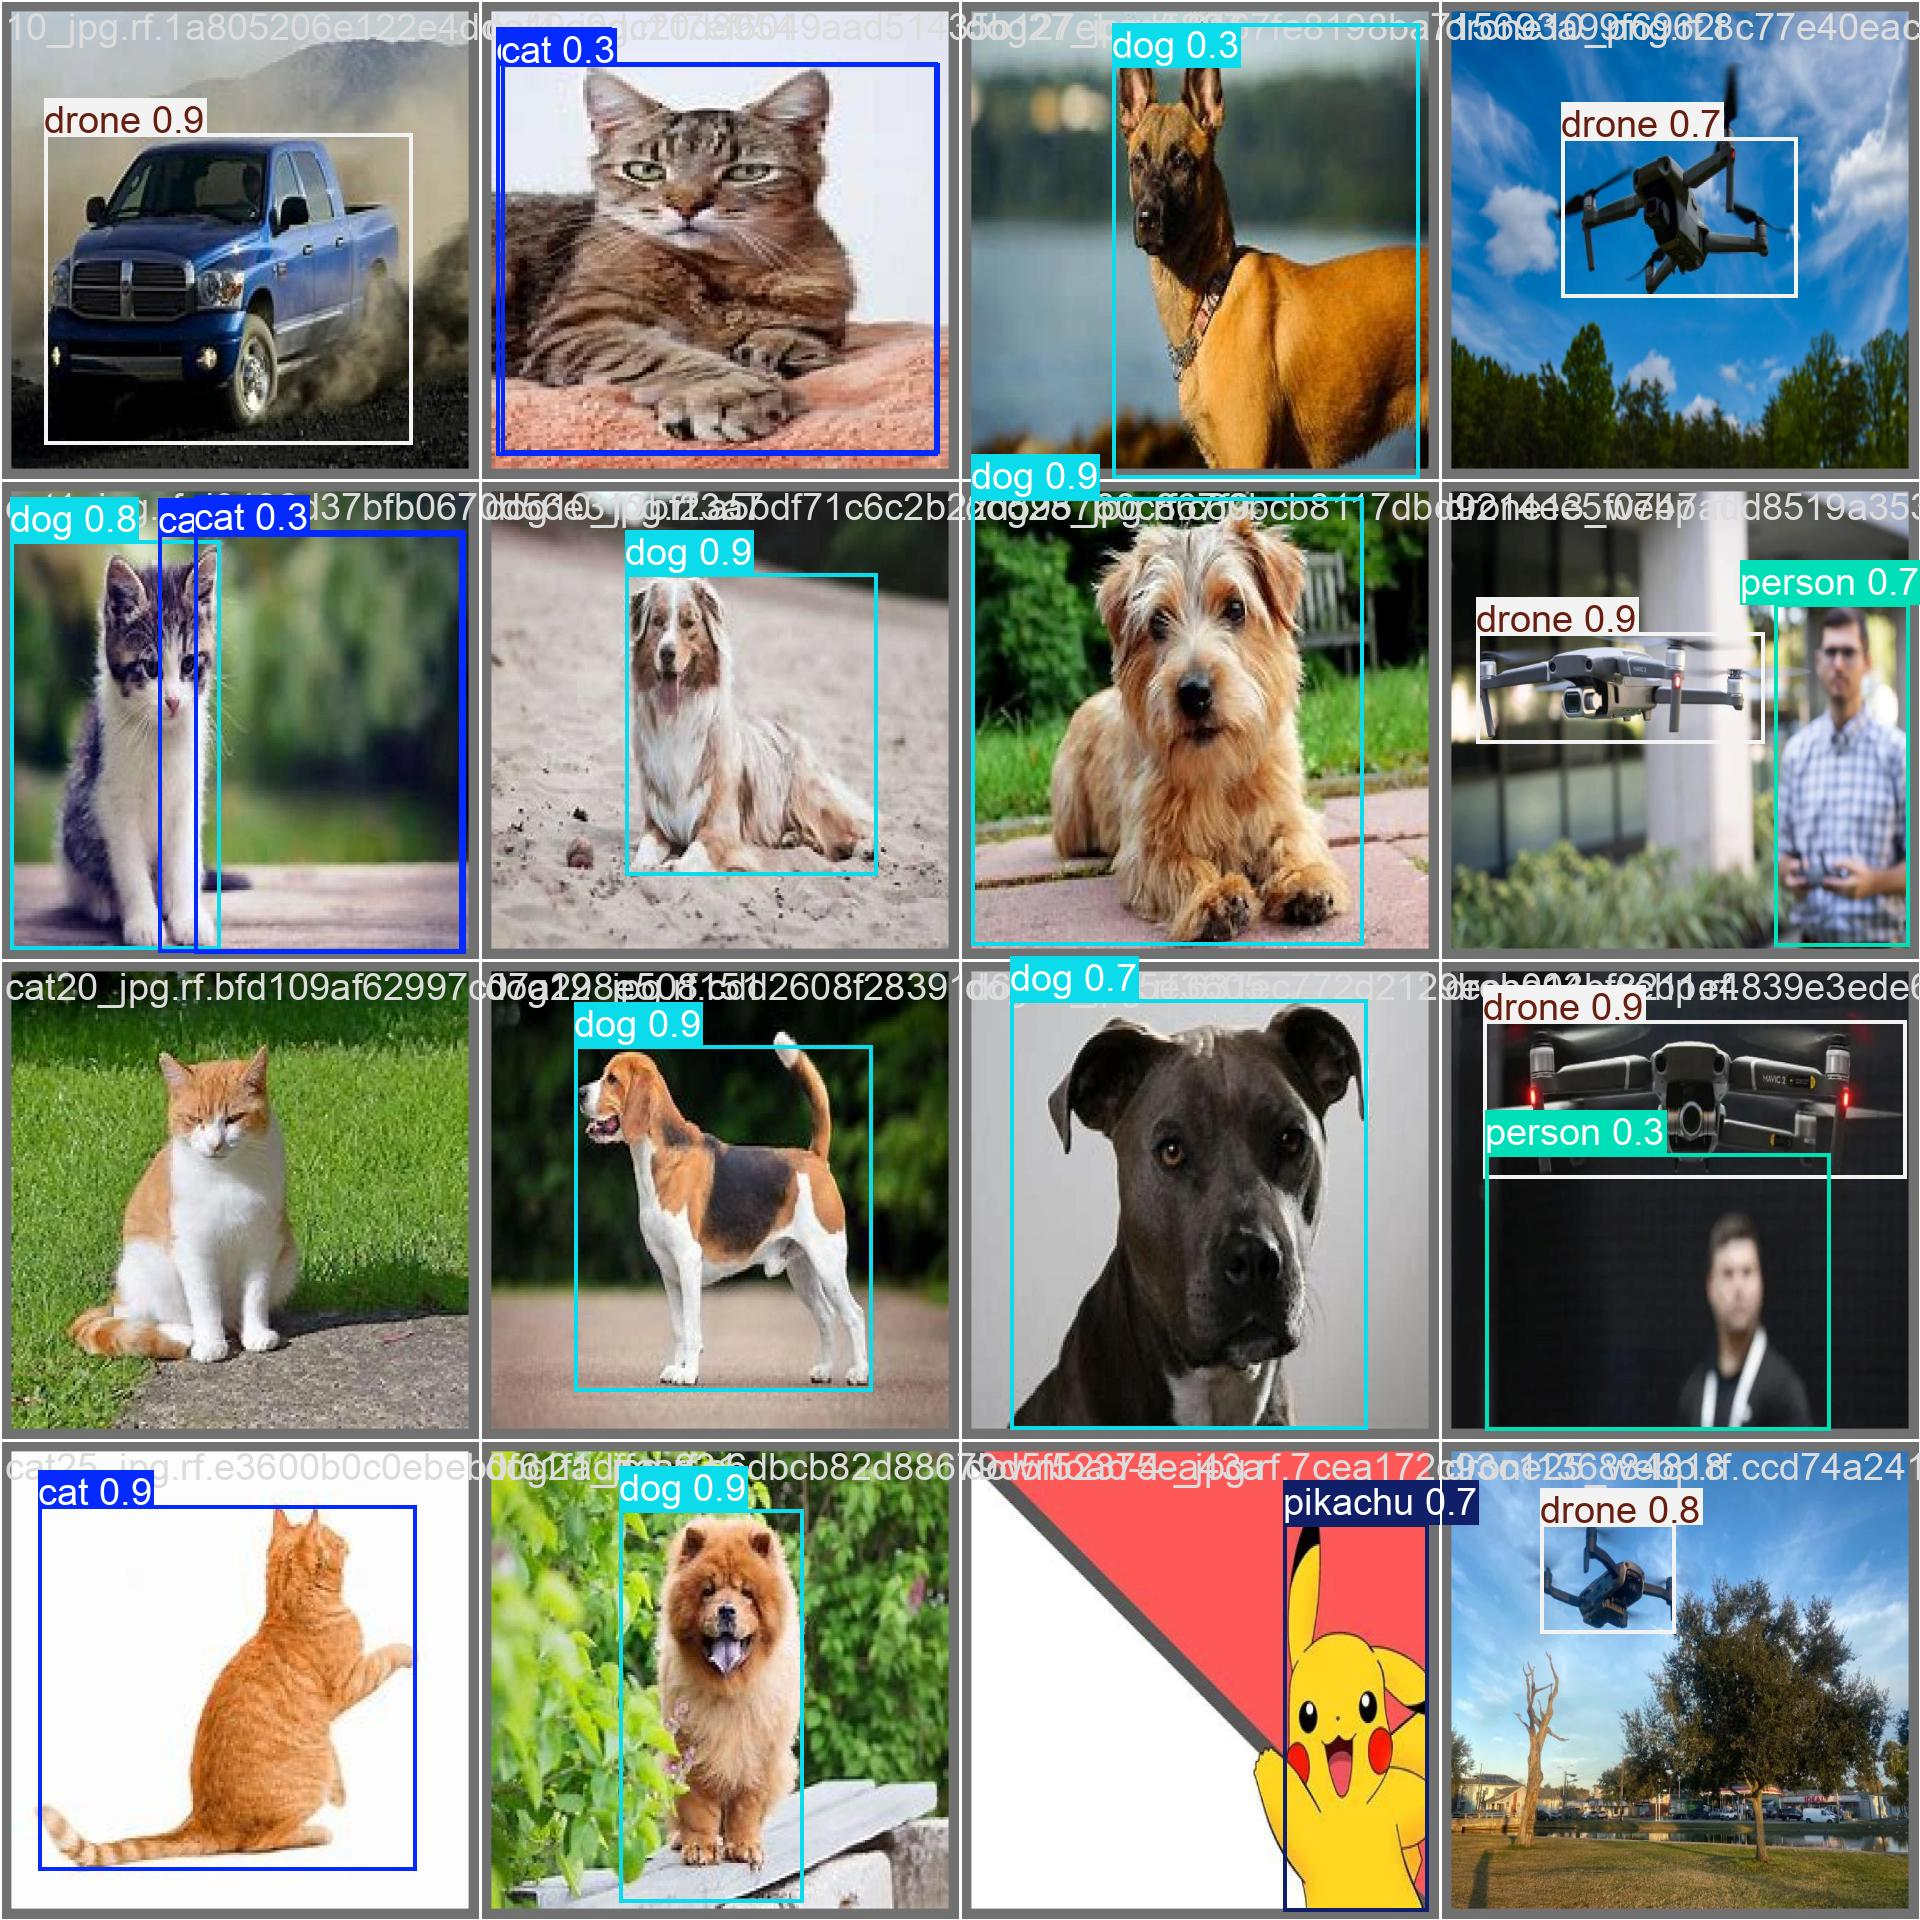

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,421,701 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/两点钟模型-3/valid/labels.cache... 259 images, 0 backgrounds, 0 corrupt: 100% 259/259 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/两点钟模型-3/valid/images/08_21C_0250_jpg.rf.b164fca68a7a644a126019aa776912c1.jpg: 2 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 17/17 [00:06<00:00,  2.59it/s]
                   all        259       4652      0.987      0.979      0.991      0.749
                  bag1        258        258      0.986      0.984      0.994       0.78
                  bag2        257        257      0.998          1      0.995      0.892
                  bag3        250        250          1      0.942      0.995      0.808
                  bag4        258        258      0.996          1      0.995      0

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/Single save=True

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,456,174 parameters, 0 gradients, 63.4 GFLOPs

image 1/20 /content/Single/1.jpg: 448x640 (no detections), 70.6ms
image 2/20 /content/Single/7.jpg: 448x640 (no detections), 26.3ms
image 3/20 /content/Single/Person1.jpg: 640x480 1 person, 63.1ms
image 4/20 /content/Single/Person2.jpg: 352x640 1 person, 56.5ms
image 5/20 /content/Single/Person3.jpg: 640x480 1 person, 27.7ms
image 6/20 /content/Single/Person4.jpg: 448x640 1 person, 26.9ms
image 7/20 /content/Single/cat1.jpg: 416x640 1 cat, 1 dog, 48.2ms
image 8/20 /content/Single/cat3.jpg: 416x640 1 cat, 24.1ms
image 9/20 /content/Single/cat5.jpg: 512x640 1 cat, 46.0ms
image 10/20 /content/Single/dog1.jpg: 448x640 1 dog, 26.0ms
image 11/20 /content/Single/dog12.jpg: 448x640 1 dog, 24.9ms
image 12/20 /content/Single/dog13.jpg: 640x480 1 dog, 26.2ms
image 13/20 /content/Single/dog25.jpg: 512x640 1 dog, 17.8ms
image 14/20 

**NOTE:** Let's take a look at few results.

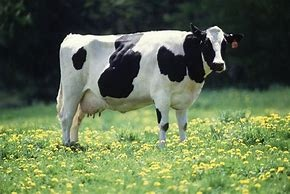

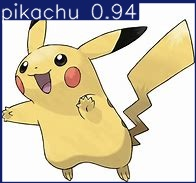

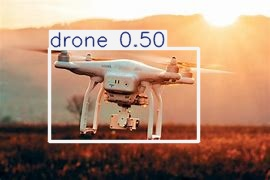

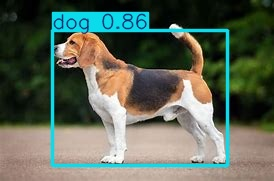

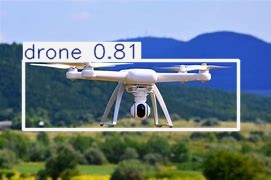

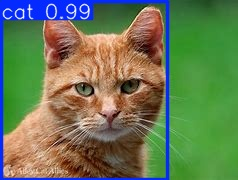

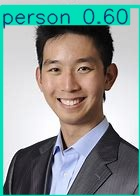

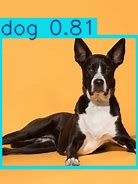

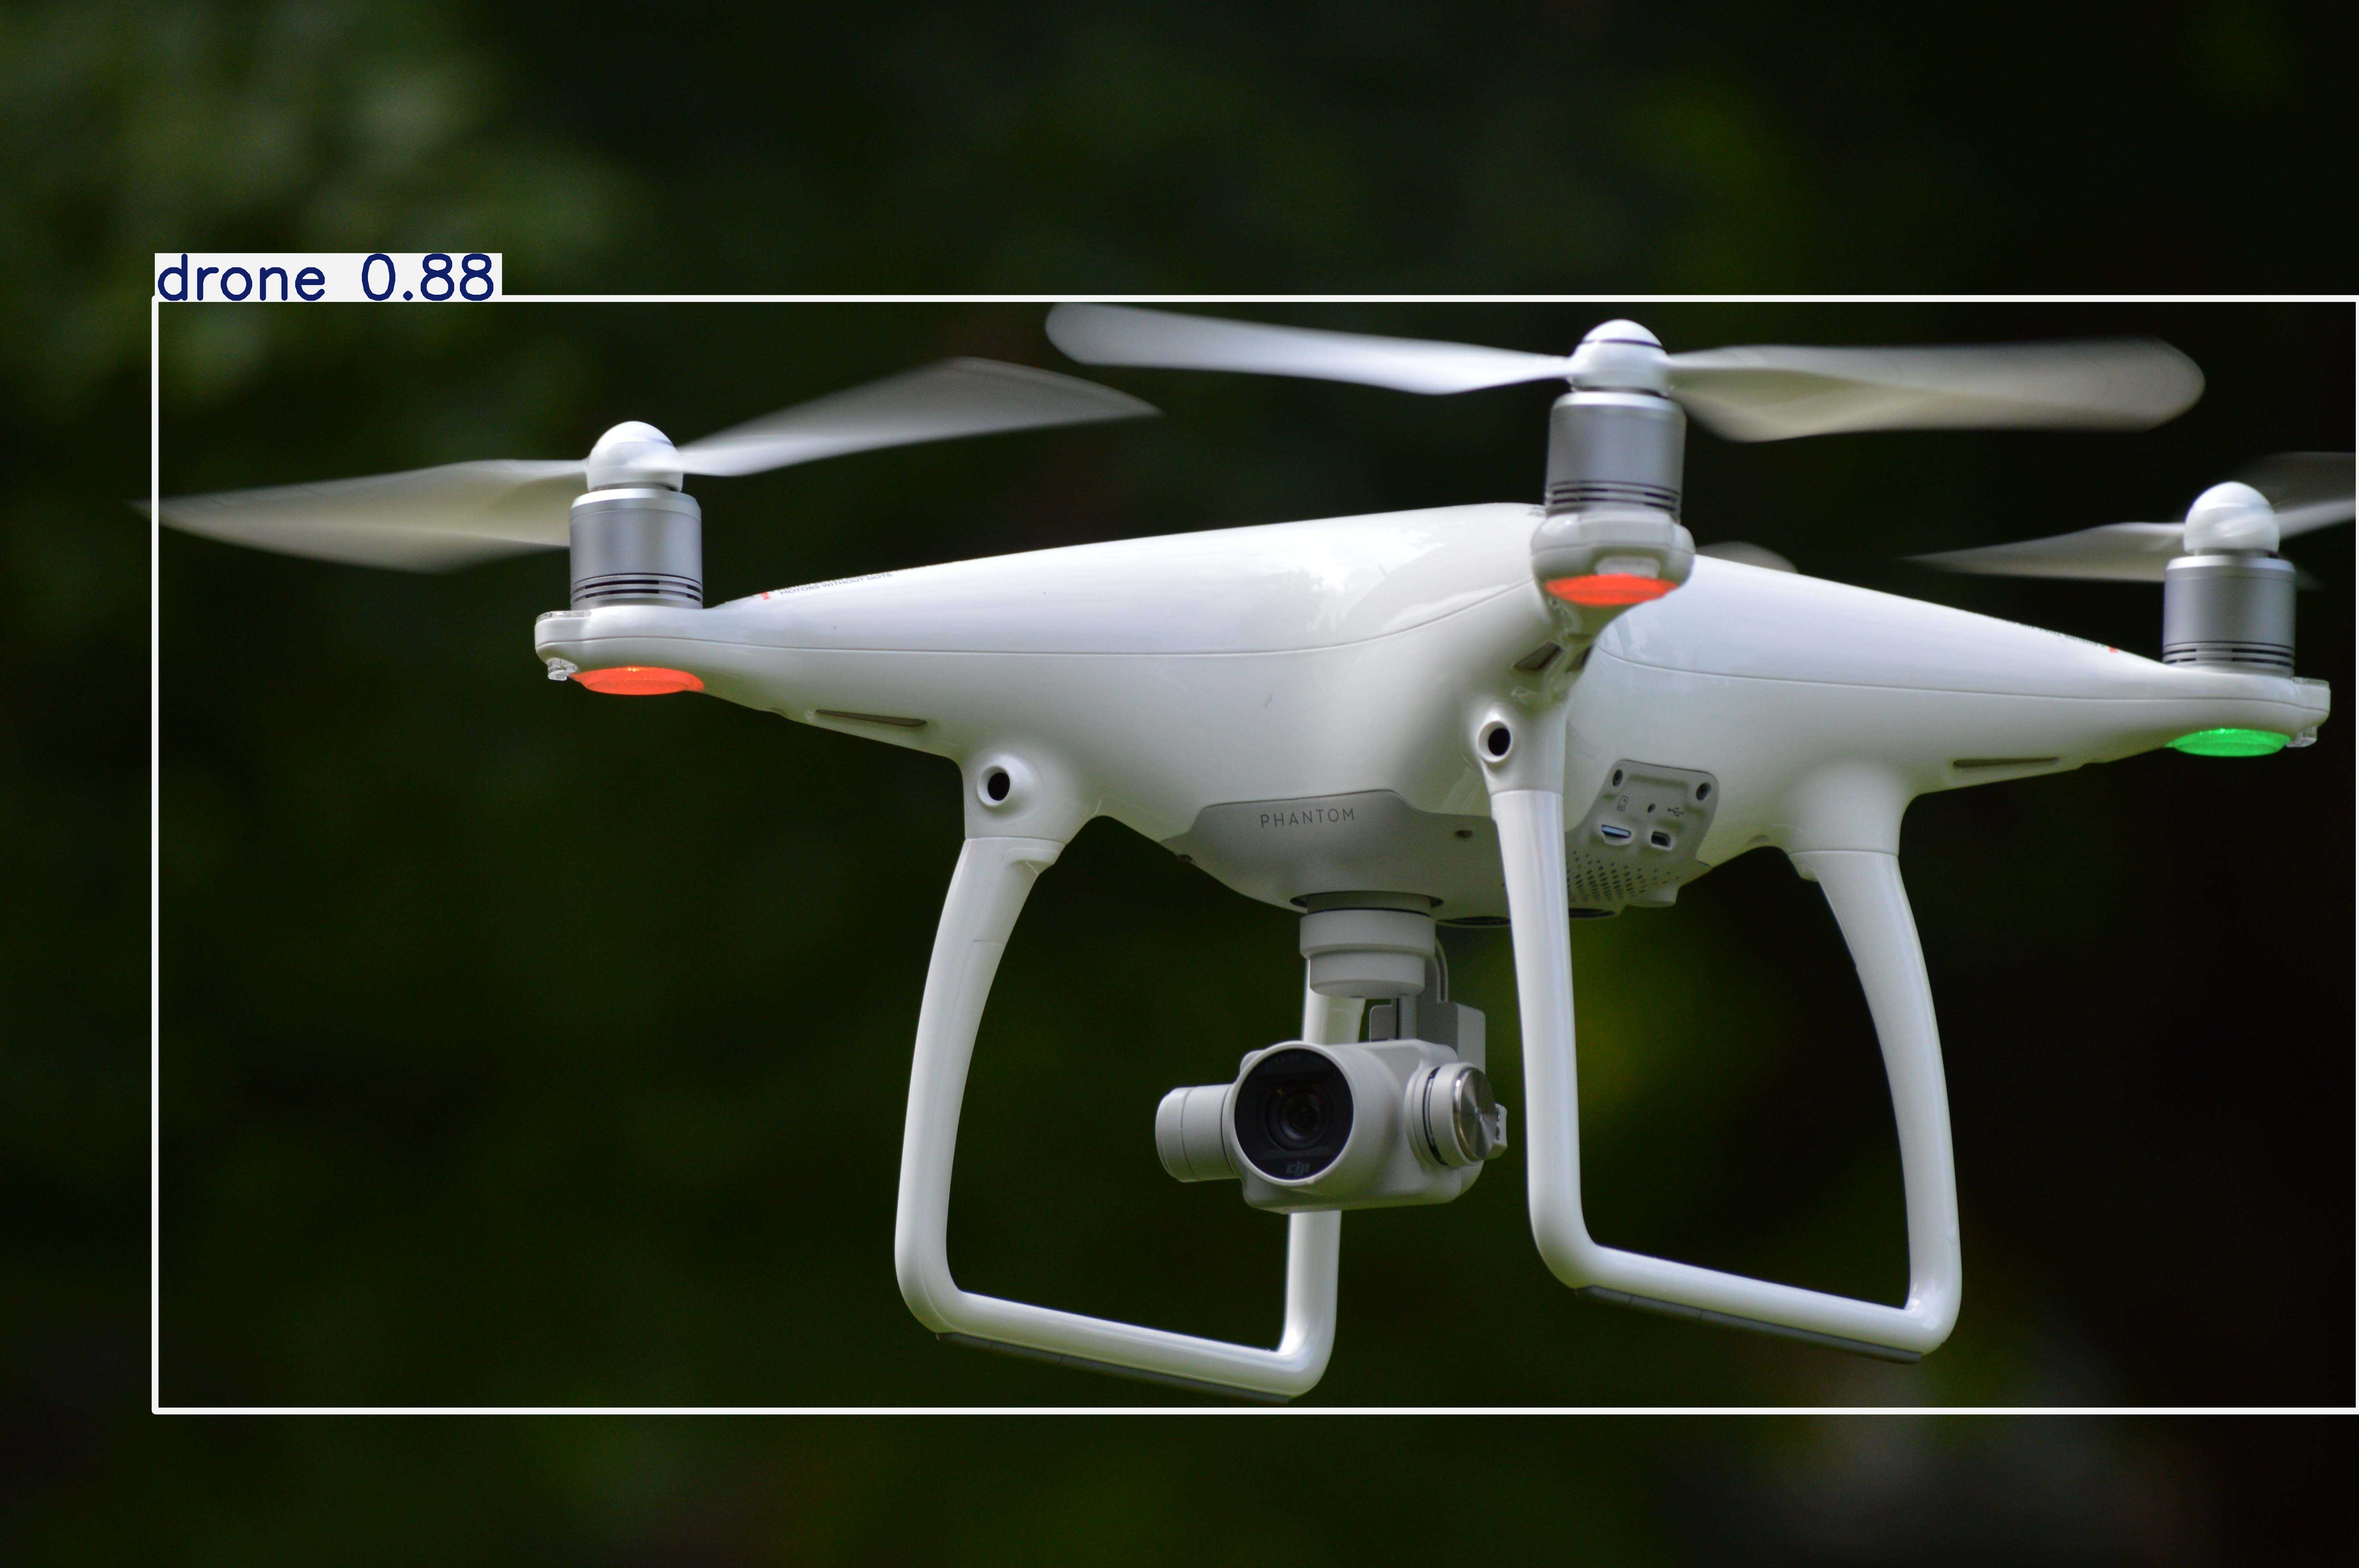

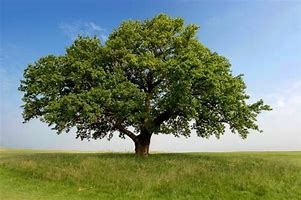

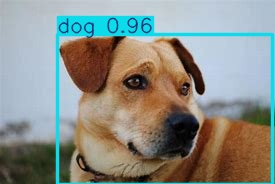

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict3*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:11]:
    display(IPyImage(filename=img, width=600))
    print("\n")

Multiple Pictures into One Picture Grid

In [ ]:
from PIL import Image
import os
import math

# Path to the folder containing images
image_folder = '/content/runs/detect/predict3/'

# Output file for the final grid image
output_file = "output_single.jpg"

# Number of images per row and column
rows, cols = 4, 3

# Read all image file paths
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Sort images or shuffle if needed
image_files = sorted(image_files)

# Limit the images to fit the grid
image_files = image_files[:rows * cols]

# Open all images and resize to the same dimensions
images = [Image.open(img).resize((200, 200)) for img in image_files]  # Resize all to 200x200

# Determine the size of the final grid image
grid_width = cols * images[0].width
grid_height = rows * images[0].height

# Create a blank canvas for the grid
grid_image = Image.new("RGB", (grid_width, grid_height))

# Paste each image into the grid
for idx, img in enumerate(images):
    x = (idx % cols) * img.width
    y = (idx // cols) * img.height
    grid_image.paste(img, (x, y))

# Save the final grid image
grid_image.save(output_file)
print(f"Image grid saved as {output_file}")


Image grid saved as output_single.jpg


#Video Processing

In [ ]:
# Install required libraries
!pip install ultralytics opencv-python-headless ffmpeg-python

# Import necessary libraries
import cv2
from ultralytics import YOLO
from IPython.display import Video

# Load the YOLO model
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)
print(f"Loaded model from: {model_path}")

# Define the input and output video paths
input_video_path = "/content/TestPictures/Videos/MultipleDogWalking.mp4"
output_video_path = "/content/output_video.mp4"
print(f"Input video: {input_video_path}")

# Open the input video
cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define codec and create the VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process the video frame by frame
try:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Perform object detection
        results = model(frame)

        # Draw bounding boxes and labels on the frame
        for detection in results[0].boxes:
            x1, y1, x2, y2 = map(int, detection.xyxy[0])  # Bounding box coordinates
            conf = detection.conf[0]  # Confidence score
            cls = int(detection.cls[0])  # Class index
            label = f"{model.names[cls]} {conf:.2f}"

            # Draw bounding box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Write the processed frame to the output video
        out.write(frame)

finally:
    # Release resources
    cap.release()
    out.release()

print(f"Processing complete. Output video saved to: {output_video_path}")

# Display the saved video
print("Playing the processed video...")
Video(output_video_path, embed=True)


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.